# *UnsuperVised InsuranceA nalysis*

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## *Analysis objective :<br> Apply Unsupervised Learning Techniques On Insurance Data*

---

## *A. Importing data**

In [3]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/data_car.csv")
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


---

## *B. Data shape :*

In [4]:
df.shape

(67856, 11)

---

## *C. Data info :*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 5.7+ MB


---

## *D. Data Cleaning :*

### *D.1 Removing unnecessary features -(X_OBSTAT ,clm)- :*

In [6]:
df=df.drop(["X_OBSTAT_","clm"],axis=1)


### *D.1 na-values :*

In [7]:
df.isna().sum().sum()
df.isna().sum()

veh_value    0
exposure     0
numclaims    0
claimcst0    0
veh_body     0
veh_age      0
gender       0
area         0
agecat       0
dtype: int64

### *D.2 convert data types :*

In [8]:
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")

### *D.3 convert veh_value into correct format :*

In [9]:
df["veh_value"]=df["veh_value"]*10000

### *D.4 Filter veh_value and claimcst0 with more than 0 :*

In [10]:
df=df[df["veh_value"]>0]
df=df[df["claimcst0"]>0]

---

## *E. EDA --Exploration data analysis*

* *Define categorical_columns and numerical_columns :*

In [11]:
categorical_columns =df.select_dtypes(include=['object']).columns.tolist()
numerical_columns =df.select_dtypes(include=['float64','int64']).columns.tolist()

### *E.1 Descriptive Analysis :*

In [12]:
pd.DataFrame(df[numerical_columns].describe())

,veh_value,exposure,numclaims,claimcst0
count,4618.000000,4618.000000,4618.000000,4618.000000
mean,18616.111087,0.610834,1.067345,2013.086464
std,11584.085584,0.261503,0.270592,3547.973696
min,2200.000000,0.002738,1.000000,200.000000
25%,11000.000000,0.410678,1.000000,353.770000
50%,15700.000000,0.636550,1.000000,761.349999
75%,23175.000000,0.832307,1.000000,2090.927497
max,139000.000000,0.999316,4.000000,55922.129883


In [13]:
pd.DataFrame(df[categorical_columns].describe())

,veh_body,veh_age,gender,area,agecat
count,4618,4618,4618,4618,4618
unique,13,4,2,6,6
top,SEDAN,3,F,C,3
freq,1476,1362,2647,1412,1111


### *E.2 Data Visualization :*

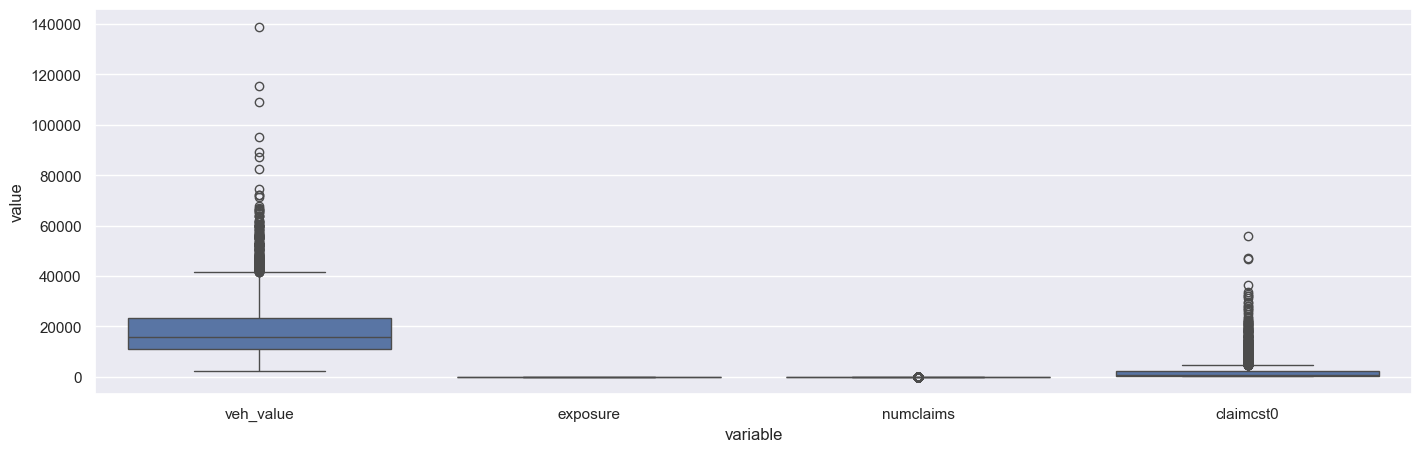

In [15]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.boxplot(data=df.melt(value_vars=numerical_columns),
            x='variable', y='value');

---

## *C. Unsupervised Learning :*

### *C.1 Data Preparation :*

* *Define x,y features (The Gender in this case is our target) :*

In [16]:
x=df.drop("gender",axis=1)
y=df["gender"]

* *Define the new categorical_columns and numerical_columns :*

In [17]:
categorical_columns =x.select_dtypes(include=['object']).columns.tolist()
numerical_columns =x.select_dtypes(include=['float64','int64']).columns.tolist()

* *Apply LabelEncoder for the target feature and OneHotEncoder for the input features :*

In [18]:
from sklearn.preprocessing import (LabelEncoder,StandardScaler,OneHotEncoder)
y=LabelEncoder().fit_transform(y)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(x[categorical_columns])

* *Apply StandardScaler on the numerical_columns :*

In [19]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(x[numerical_columns])

* *Combine the scaled_numeric data and the one_hot_encoded data in one data frame :*

In [21]:
scaled_df=pd.concat([pd.DataFrame(scaled_numeric,columns=x.select_dtypes(exclude="object").columns),
           pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))],axis=1)
scaled_df.head()

,veh_value,exposure,numclaims,claimcst0,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,...,area_C,area_D,area_E,area_F,agecat_1,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6
0,-0.174060,-0.482778,-0.248908,-0.378729,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.303562,1.464795,-0.248908,-0.340083,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.951072,-0.273361,-0.248908,-0.454190,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024509,0.166413,3.447099,-0.056764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.897972,0.920312,-0.248908,0.964416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
